# Visualisation d’un nuage de points

1. Importer les librairies

In [23]:
import numpy as np
import pandas as pd
import seaborn as sns

2. Liste des variables, nature, type

In [97]:
def nature (row):
   if row['type'] == "int64" or row['type'] == "float64":
      return 'Quantitatives'
   return 'Qualitatives'

In [128]:
housePr = pd.read_csv('data/house_pricing.csv')

df = pd.DataFrame(
    index = housePr.columns
)
df['type'] = housePr.dtypes.values
df['nature'] = df.apply(lambda row: nature(row), axis=1)

df

,type,nature
Id,int64,Quantitatives
MSSubClass,int64,Quantitatives
MSZoning,object,Qualitatives
LotFrontage,float64,Quantitatives
LotArea,int64,Quantitatives
...,...,...
MoSold,int64,Quantitatives
YrSold,int64,Quantitatives
SaleType,object,Qualitatives
SaleCondition,object,Qualitatives


3. Nuage de points

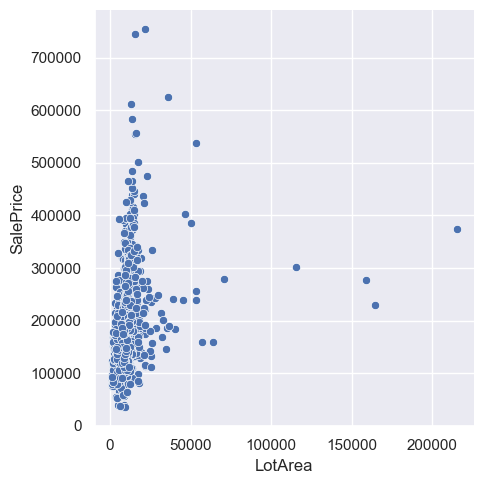

In [131]:
sns.relplot(
    x=housePr.LotArea,
    y=housePr.SalePrice
)

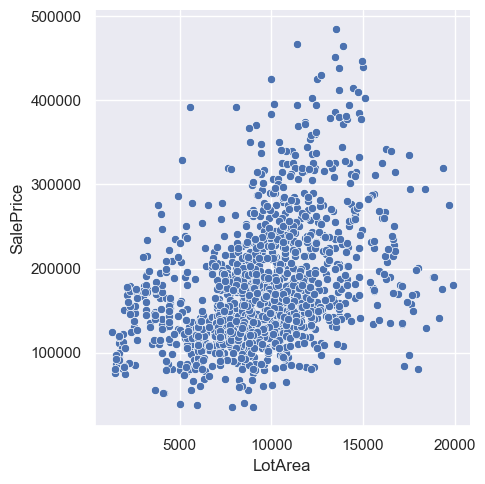

In [68]:
sns.relplot(
    data=housePr[(housePr['LotArea'] < 20000) & (housePr['SalePrice'] < 500000)],
    x="LotArea", y="SalePrice"
)

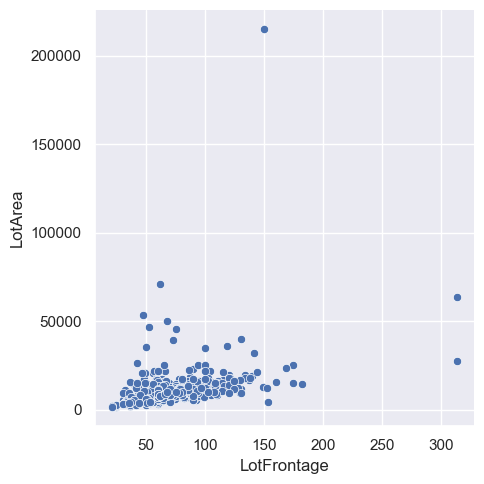

In [132]:
sns.relplot(
    x=housePr.LotFrontage,
    y=housePr.LotArea
)

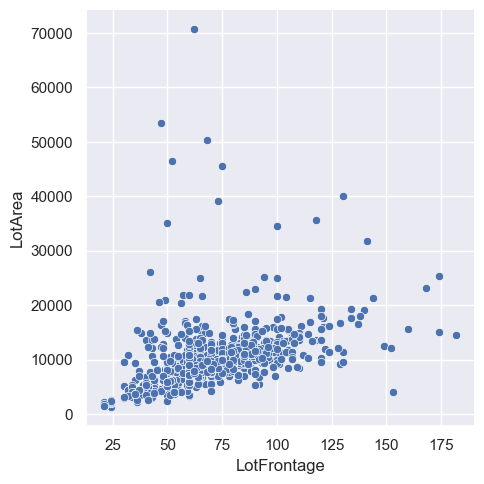

In [69]:
sns.relplot(
    data=housePr[(housePr['LotFrontage'] < 200) & (housePr['LotArea'] < 100000)],
    x="LotFrontage", y="LotArea"
)

# Visualisation de relations continues

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
sales = pd.read_csv('data/sales_predictions.csv')

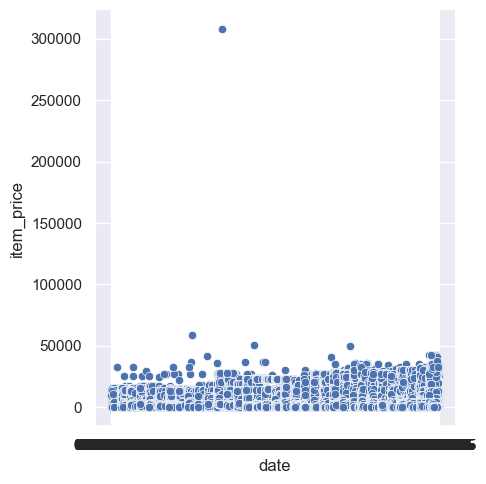

In [118]:
sns.relplot(
    data=sales,
    x="date", y="item_price"
)


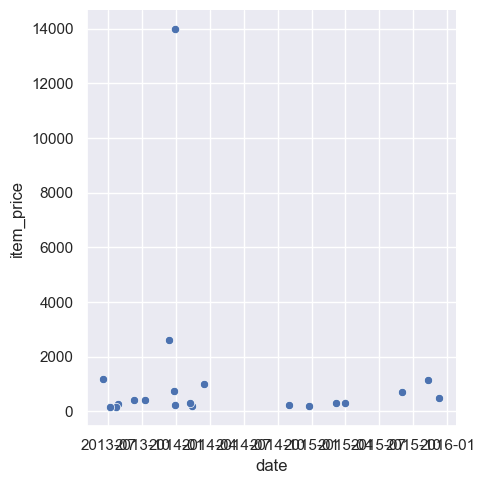

In [125]:
sns.relplot(
    data=sales.sample(20),
    x="date", y="item_price"
)

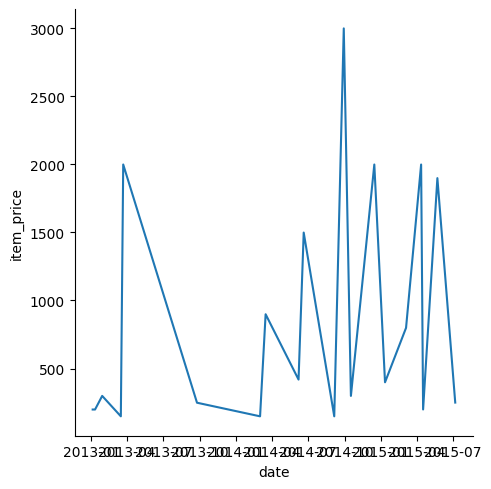

In [8]:
df = pd.DataFrame(sales.sample(20))
dt = pd.to_datetime(df.date, infer_datetime_format=True)
sns.relplot(
    x=dt,
    y=df.item_price,
    kind="line"
)


# Visualisation de variables catégoriques

In [37]:
import numpy as np
import pandas as pd
import seaborn as sns

In [51]:
ibm = pd.read_csv('data/IBM_HR_ATTRITION.csv'); ibm

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


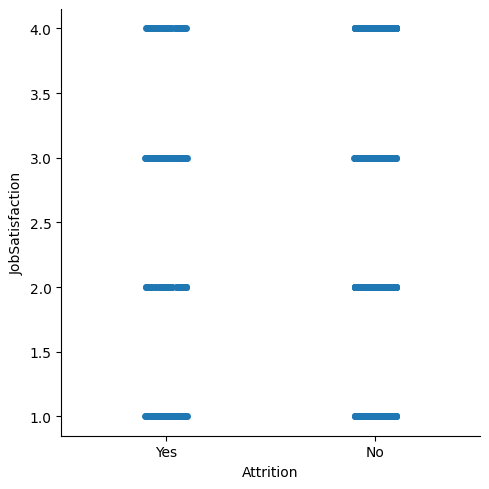

In [41]:
sns.catplot(
            x=ibm.Attrition,
            y=ibm.JobSatisfaction,
        )

<AxesSubplot: xlabel='Attrition', ylabel='JobSatisfaction'>

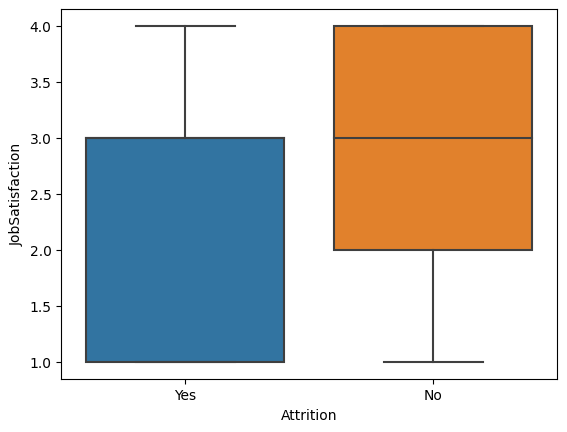

In [52]:
sns.boxplot(
            x=ibm.Attrition,
            y=ibm.JobSatisfaction,
        )

In [40]:
ibm.JobSatisfaction.describe()

count    1470.000000
mean        2.728571
std         1.102846
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         4.000000
Name: JobSatisfaction, dtype: float64

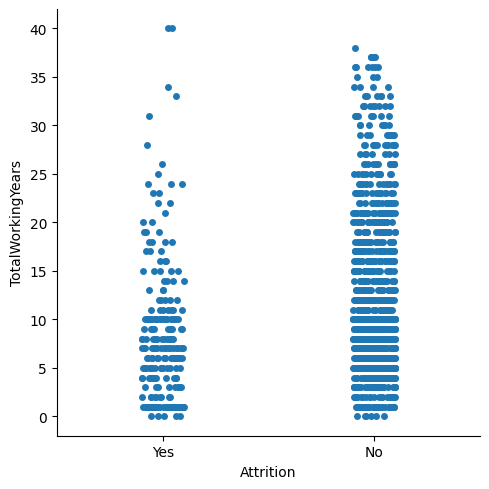

In [43]:
sns.catplot(
            x=ibm.Attrition,
            y=ibm.TotalWorkingYears,
        )

<AxesSubplot: xlabel='Attrition', ylabel='TotalWorkingYears'>

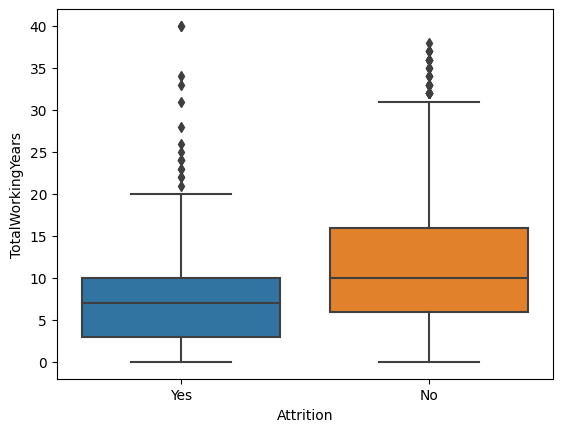

In [44]:
sns.boxplot(
            x=ibm.Attrition,
            y=ibm.TotalWorkingYears,
        )

On remarque que cet graphique contient des données asymetriques et des valeurs aberrantes

<AxesSubplot: xlabel='Attrition', ylabel='TotalWorkingYears'>

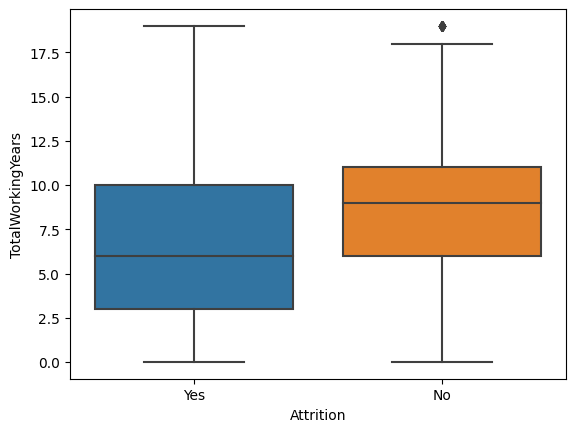

In [91]:
df = ibm[ibm.TotalWorkingYears < 20 ]
sns.boxplot(
            x=df.Attrition,
            y=df.TotalWorkingYears
        )

In [70]:
ibm = pd.read_csv('data/IBM_HR_ATTRITION.csv') #sep=";"

In [72]:
df = pd.DataFrame.copy(ibm)
df.Attrition = np.where(df.Attrition == "Yes", 1, 0)

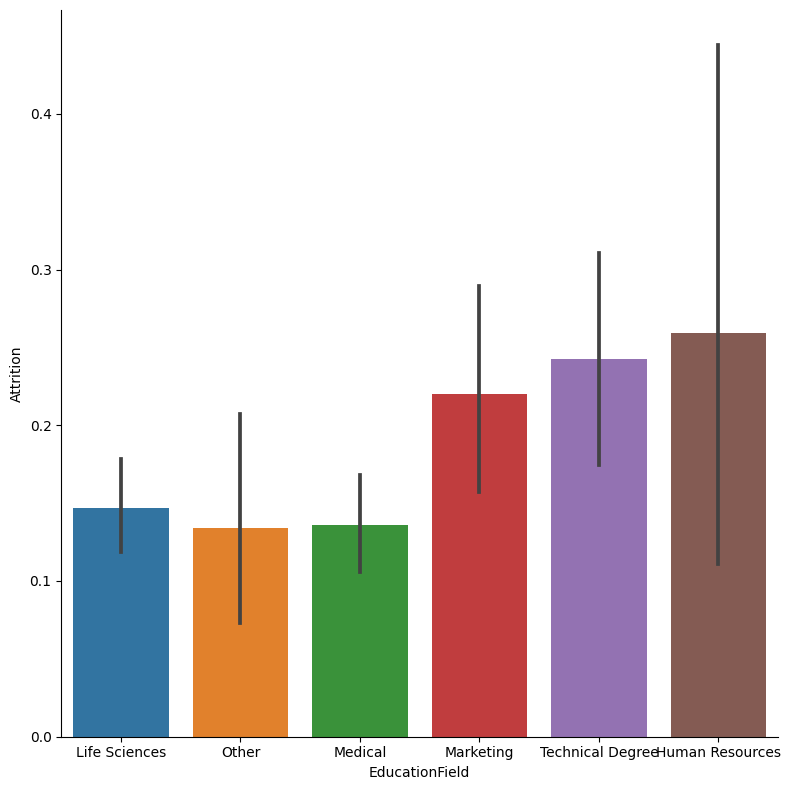

In [89]:
sns.catplot(
            data =df,
            x="EducationField", 
            y="Attrition",
            kind="bar",
            height=8
        )

# Visualisation d’une heatmap

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

In [115]:
housePr = pd.read_csv('data/house_pricing.csv')
df = housePr.iloc[:,-15:];df

,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,366,0,112,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [118]:
df.corr()

,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
WoodDeckSF,1.000000,0.058661,-0.125989,-0.032771,-0.074181,0.073378,-0.009551,0.021011,0.022270,0.324413
OpenPorchSF,0.058661,1.000000,-0.093079,-0.005842,0.074304,0.060762,-0.018584,0.071255,-0.057619,0.315856
EnclosedPorch,-0.125989,-0.093079,1.000000,-0.037305,-0.082864,0.054203,0.018361,-0.028887,-0.009916,-0.128578
3SsnPorch,-0.032771,-0.005842,-0.037305,1.000000,-0.031436,-0.007992,0.000354,0.029474,0.018645,0.044584
ScreenPorch,-0.074181,0.074304,-0.082864,-0.031436,1.000000,0.051307,0.031946,0.023217,0.010694,0.111447
PoolArea,0.073378,0.060762,0.054203,-0.007992,0.051307,1.000000,0.029669,-0.033737,-0.059689,0.092404
MiscVal,-0.009551,-0.018584,0.018361,0.000354,0.031946,0.029669,1.000000,-0.006495,0.004906,-0.021190
MoSold,0.021011,0.071255,-0.028887,0.029474,0.023217,-0.033737,-0.006495,1.000000,-0.145721,0.046432
YrSold,0.022270,-0.057619,-0.009916,0.018645,0.010694,-0.059689,0.004906,-0.145721,1.000000,-0.028923
SalePrice,0.324413,0.315856,-0.128578,0.044584,0.111447,0.092404,-0.021190,0.046432,-0.028923,1.000000


<AxesSubplot: >

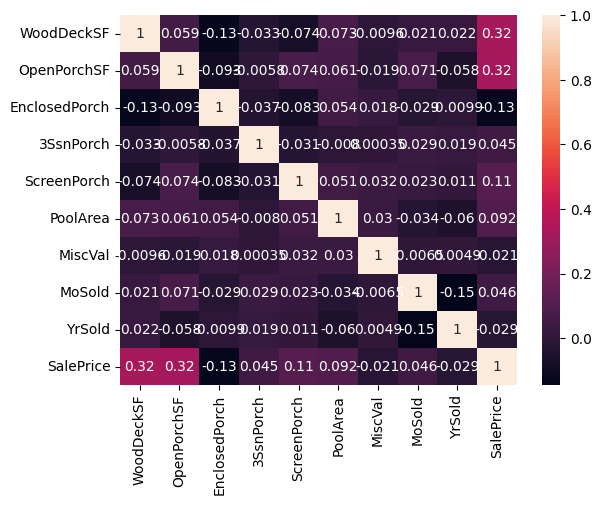

In [120]:
sns.heatmap(df.corr(),annot=True)